# تحليل والتنبؤ بانبعاثات ثاني أكسيد الكربون باستخدام GGO-MLP

هذا الملف يوضح سير العمل الكامل للمشروع، بدءاً من تجهيز البيانات وصولاً إلى تحسين النموذج وتقييمه النهائي.

In [3]:
import sys
import os

# إضافة المسار الجذري للمشروع
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# الآن يمكنك الاستيراد بشكل صحيح
from scripts.optimize import run_optimization

In [7]:
# 1. تجهيز البيئة وتثبيت المكتبات المطلوبة
!pip install -r ../requirements.txt

# 2. تشغيل خوارزمية GGO لتحسين المعاملات الفائقة
from scripts.optimize import run_optimization
best_params = run_optimization()
print("أفضل معاملات فائقة تم العثور عليها:", best_params)

--- Starting Hyperparameter Optimization with GGO ---
Starting GGO Hyperparameter Optimization...
Iteration 1/10: Best RMSE = 2.1420
Iteration 2/10: Best RMSE = 2.0983
Iteration 3/10: Best RMSE = 2.0983
Iteration 4/10: Best RMSE = 2.0983
Iteration 5/10: Best RMSE = 2.0808
Iteration 6/10: Best RMSE = 2.0808
Iteration 7/10: Best RMSE = 2.0808
Iteration 8/10: Best RMSE = 2.0808
Iteration 9/10: Best RMSE = 2.0782
Iteration 10/10: Best RMSE = 2.0782

GGO Optimization Complete.

Optimization complete. Best parameters saved to ../results/best_params.json
{
    "learning_rate_init": 0.005212777143489146,
    "hidden_layer_size_1": 74,
    "hidden_layer_size_2": 53,
    "best_rmse": 2.0782139701996596
}
أفضل معاملات فائقة تم العثور عليها: {'learning_rate_init': np.float64(0.005212777143489146), 'hidden_layer_size_1': 74, 'hidden_layer_size_2': 53, 'best_rmse': np.float64(2.0782139701996596)}


In [8]:
# 3. تدريب النموذج النهائي باستخدام أفضل المعاملات
from scripts.train_mlp import train_final_model
pipeline, X_test, y_test = train_final_model(best_params)
print("تم تدريب النموذج النهائي بنجاح.")


--- Training Final MLP Model with Optimized HPs: (74, 53), LR=0.00521 ---
Final model training complete.
تم تدريب النموذج النهائي بنجاح.



--- Model Performance Metrics ---
{
    "MSE": 5.2827,
    "RMSE": 2.2984,
    "MAE": 1.5762,
    "R2": 0.9985
}
Metrics saved to ../results/metrics.json
Scatter plot saved as ../results/figures/actual_vs_predicted.png
مقاييس الأداء النهائية: {'MSE': 5.2827, 'RMSE': 2.2984, 'MAE': 1.5762, 'R2': 0.9985}


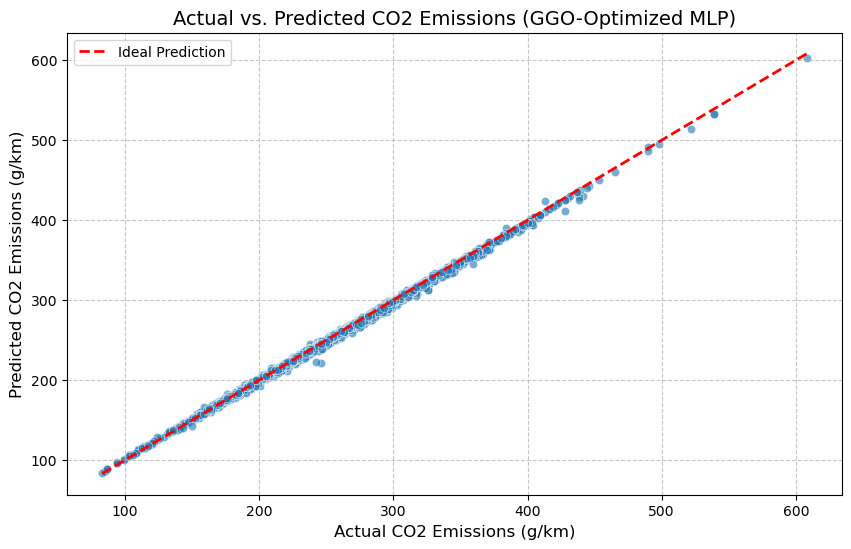

In [9]:
# 4. تقييم النموذج وحفظ النتائج
from scripts.evaluate import evaluate_model
metrics = evaluate_model(pipeline, X_test, y_test)
print("مقاييس الأداء النهائية:", metrics)

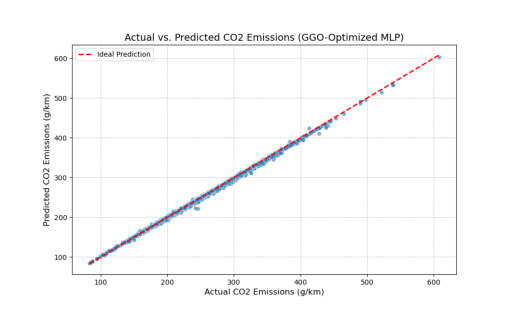

In [10]:
# 5. عرض الرسم البياني للنتائج
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../results/figures/actual_vs_predicted.png')
plt.imshow(img)
plt.axis('off')
plt.show()